## Ejemplo 7: Gráficas de barras apiladas

### 1. Objetivos:
    - Aprender a generar e interpretar gráficas de barras apiladas
 
---
    
### 2. Desarrollo:

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../Datasets/athlete_olympic_events-clean.csv', index_col=0)

df.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None


Por ejemplo, digamos que queremos graficar la frecuencia de los 4 deportes que analizamos anteriormente. Queremos ver cuántas veces aparece cada uno en nuestro dataset para compararlos.

In [3]:
df_grouped = df.groupby('name')[['sex', 'sport']].max()

In [4]:
df_ball = df_grouped[df_grouped['sport'].isin(['Basketball', 'Volleyball', 'Football', 'Baseball'])]

In [5]:
value_counts_all = df_ball['sport'].value_counts()

value_counts_all

Football      3993
Basketball    2607
Volleyball    2374
Baseball       703
Name: sport, dtype: int64

/Users/ramon/Env/data_science/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


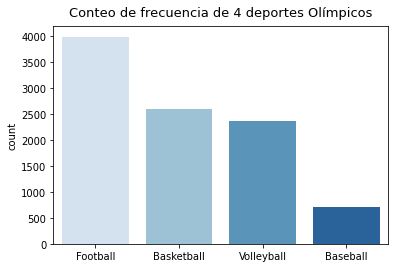

In [6]:
fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(value_counts_all.index, value_counts_all, ax=ax, palette='Blues');

ax.set_ylabel('count')
ax.set_title('Conteo de frecuencia de 4 deportes Olímpicos', fontsize=13, pad=10);

¡Listo! Pero qué pasa si ahora además queremos segmentar nuestros conteos utilizando la variable 'sex'. Esto nos servirá para saber cómo es que cada género contribuye al conteo total de atletas.

In [7]:
df_grouped['count'] = 1

df_grouped.head()

,sex,sport,count
name,,,
Th Anh,F,Fencing,1
Th Ngn Thng,F,Gymnastics,1
Tin Tun,M,Boxing,1
A Dijiang,M,Basketball,1
A Lamusi,M,Judo,1


In [8]:
df_ball_with_count = df_grouped[df_grouped['sport'].isin(['Basketball', 'Volleyball', 'Football', 'Baseball'])]

In [9]:
value_counts = df_ball_with_count.groupby(['sport', 'sex'])['count'].sum()

value_counts

sport       sex
Baseball    M       703
Basketball  F       877
            M      1730
Football    F       703
            M      3290
Volleyball  F      1074
            M      1300
Name: count, dtype: int64

In [10]:
value_counts = value_counts.unstack(1)

value_counts

sex,F,M
sport,,
Baseball,NaN,703.0
Basketball,877.0,1730.0
Football,703.0,3290.0
Volleyball,1074.0,1300.0


In [11]:
value_counts = value_counts.fillna(0)

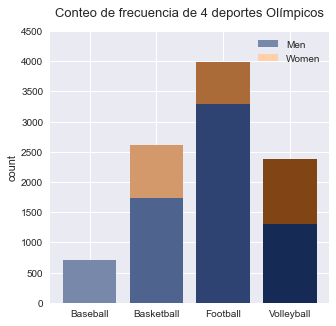

In [17]:
plt.style.use('seaborn')

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()

plt1 = ax.bar(value_counts.index, value_counts['M'], label='M',
              color=["#7788AA","#4E638E","#2E4372","#152A55"])
plt2 = ax.bar(value_counts.index, value_counts['F'], bottom=value_counts['M'],
              color=["#FFD0AA", "#D4996A", "#AA6B39", "#804415"])

ax.set_ylabel('count')
ax.set_title('Conteo de frecuencia de 4 deportes Olímpicos', fontsize=13, pad=15);
plt.legend((plt1[0], plt2[0]), ('Men', 'Women'));
ax.set_ylim(0, 4500);

Con esta gráfica se vuelve muy evidente la disparidad que existe en casi todos estos deportes. Excepto por volleyball, donde la participación de hombres y mujeres es similar, en los demás deportes la participación es femenina es mucho menor o incluso nula.